<a href="https://colab.research.google.com/github/frm1789/100DaysOfPython/blob/main/Predicting_students_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [92]:
# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.offline as po
import plotly.graph_objs as go
import plotly.express as px

import sklearn
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )


In [93]:
df = pd.read_csv("df.csv")

In [94]:
df.isna().any()

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance                        False
Previous qualification                            False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                            False
Scholarship holder                                False
Age at enrollment                               

In [95]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [96]:
#df.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)

In [97]:
df['Target'] = df['Target'].map({'Dropout': 0,
                                 'Enrolled': 1,
                                 "Graduate": 2})

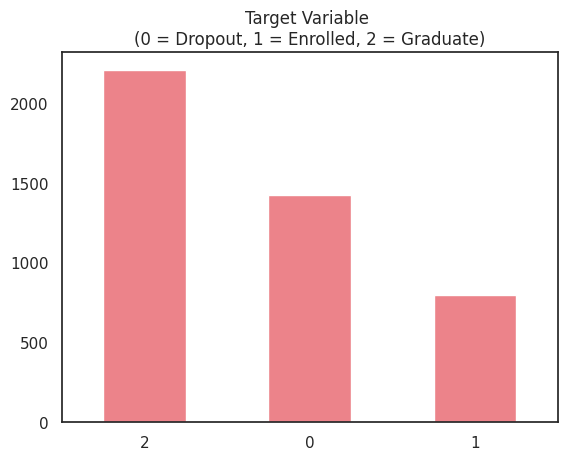

In [98]:
plt.title('Target Variable \n' '(0 = Dropout, 1 = Enrolled, 2 = Graduate)')
df['Target'].value_counts().plot(kind='bar', color='#ec838a')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.savefig('target_variable_plot.png')

plt.show()

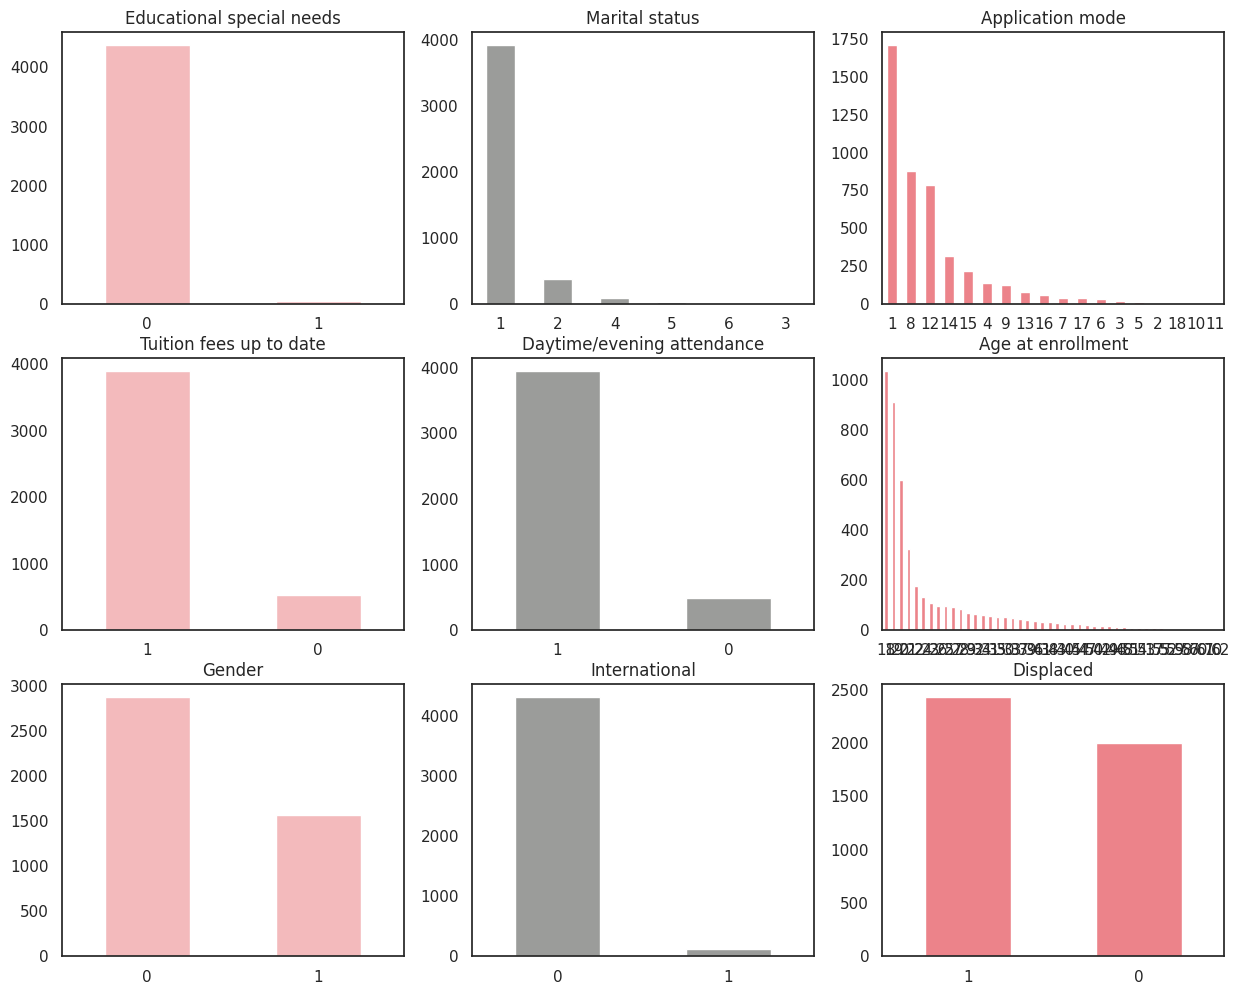

In [99]:
background = ['Educational special needs', 'Tuition fees up to date', 'Gender', 'Marital status', 'Daytime/evening attendance', 'International', 'Application mode', 'Age at enrollment', 'Displaced']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, item in enumerate(background):
    if i < 3:
        ax = df[item].value_counts().plot(kind='bar', ax=axes[i, 0], rot=0, color='#f3babc')
    elif 3 <= i < 6:
        ax = df[item].value_counts().plot(kind='bar', ax=axes[i - 3, 1], rot=0, color='#9b9c9a')
    elif i < 9:
        ax = df[item].value_counts().plot(kind='bar', ax=axes[i - 6, 2], rot=0, color='#ec838a')

    ax.set_title(item)

plt.show()

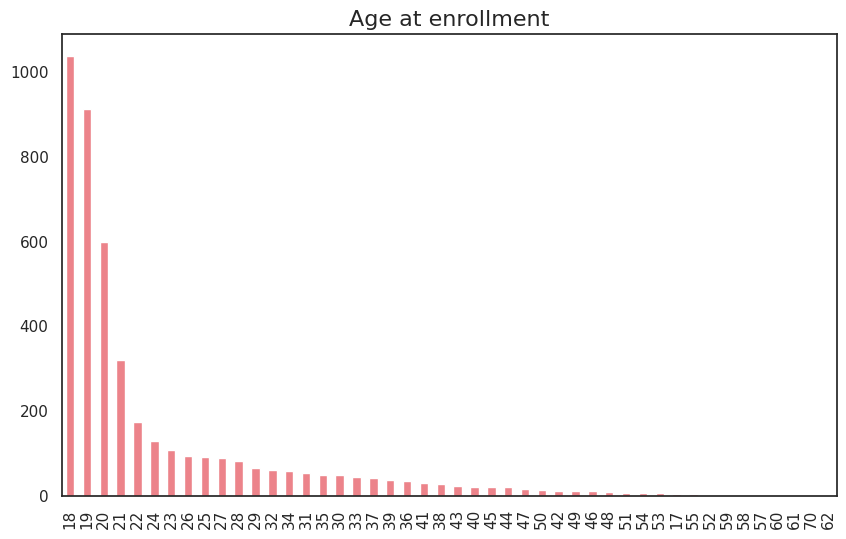

In [100]:
plt.figure(figsize=(10, 6))  # Set the figure size first
plt.title('Age at enrollment', fontsize=16)  # Then set the title

df['Age at enrollment'].value_counts().plot(kind='bar', color='#ec838a')
plt.xticks(rotation=90, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


In [101]:
df['Age at enrollment'] = np.where(df['Age at enrollment'] > 21, 40, df['Age at enrollment'])

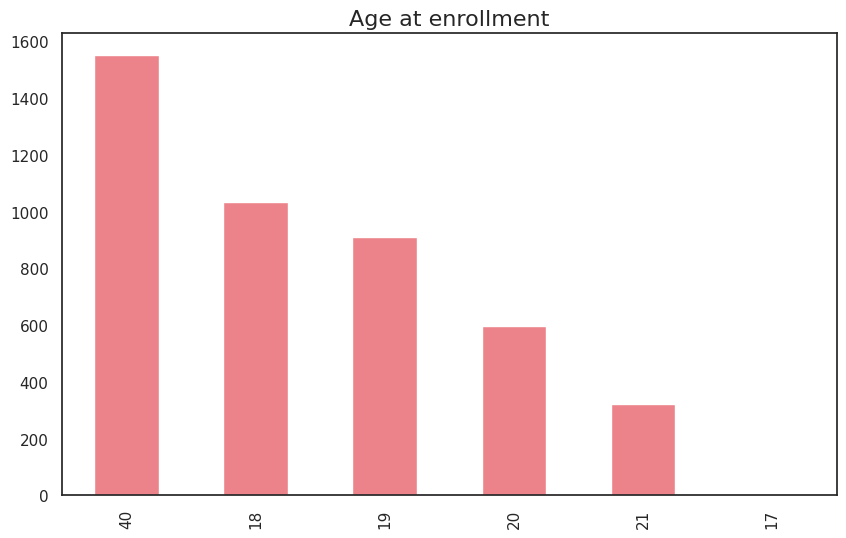

In [102]:
plt.figure(figsize=(10, 6))  # Set the figure size first
plt.title('Age at enrollment', fontsize=16)  # Then set the title

df['Age at enrollment'].value_counts().plot(kind='bar', color='#ec838a')
plt.xticks(rotation=90, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.savefig('age_Enrollment.png')
plt.show()

In [103]:
sns.set(style="white")
corr = df.corrwith(df.Target).sort_values(ascending=False)
corr


Target                                            1.000000
Curricular units 2nd sem (approved)               0.624157
Curricular units 2nd sem (grade)                  0.566827
Curricular units 1st sem (approved)               0.529123
Curricular units 1st sem (grade)                  0.485207
Tuition fees up to date                           0.409827
Scholarship holder                                0.297595
Curricular units 2nd sem (enrolled)               0.175847
Curricular units 1st sem (enrolled)               0.155974
Displaced                                         0.113986
Curricular units 2nd sem (evaluations)            0.092721
Application order                                 0.089791
Daytime/evening attendance                        0.075107
Curricular units 2nd sem (credited)               0.054004
Father's occupation                               0.051702
Mother's occupation                               0.048424
Curricular units 1st sem (credited)               0.0481

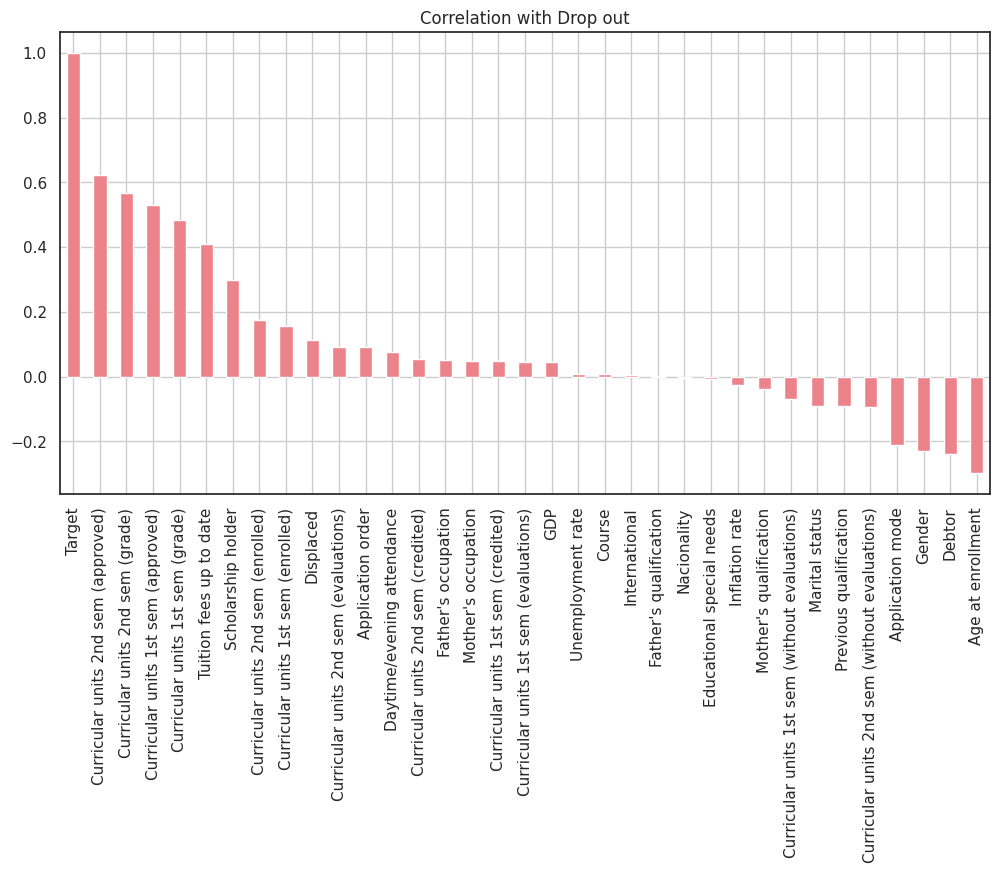

In [104]:
corr.plot.bar(figsize = (12, 6), fontsize = 11, color = '#ec838a', rot = 90, grid = True)
plt.title('Correlation with Drop out')
plt.savefig('Correlation with Drop out.png')
plt.show()

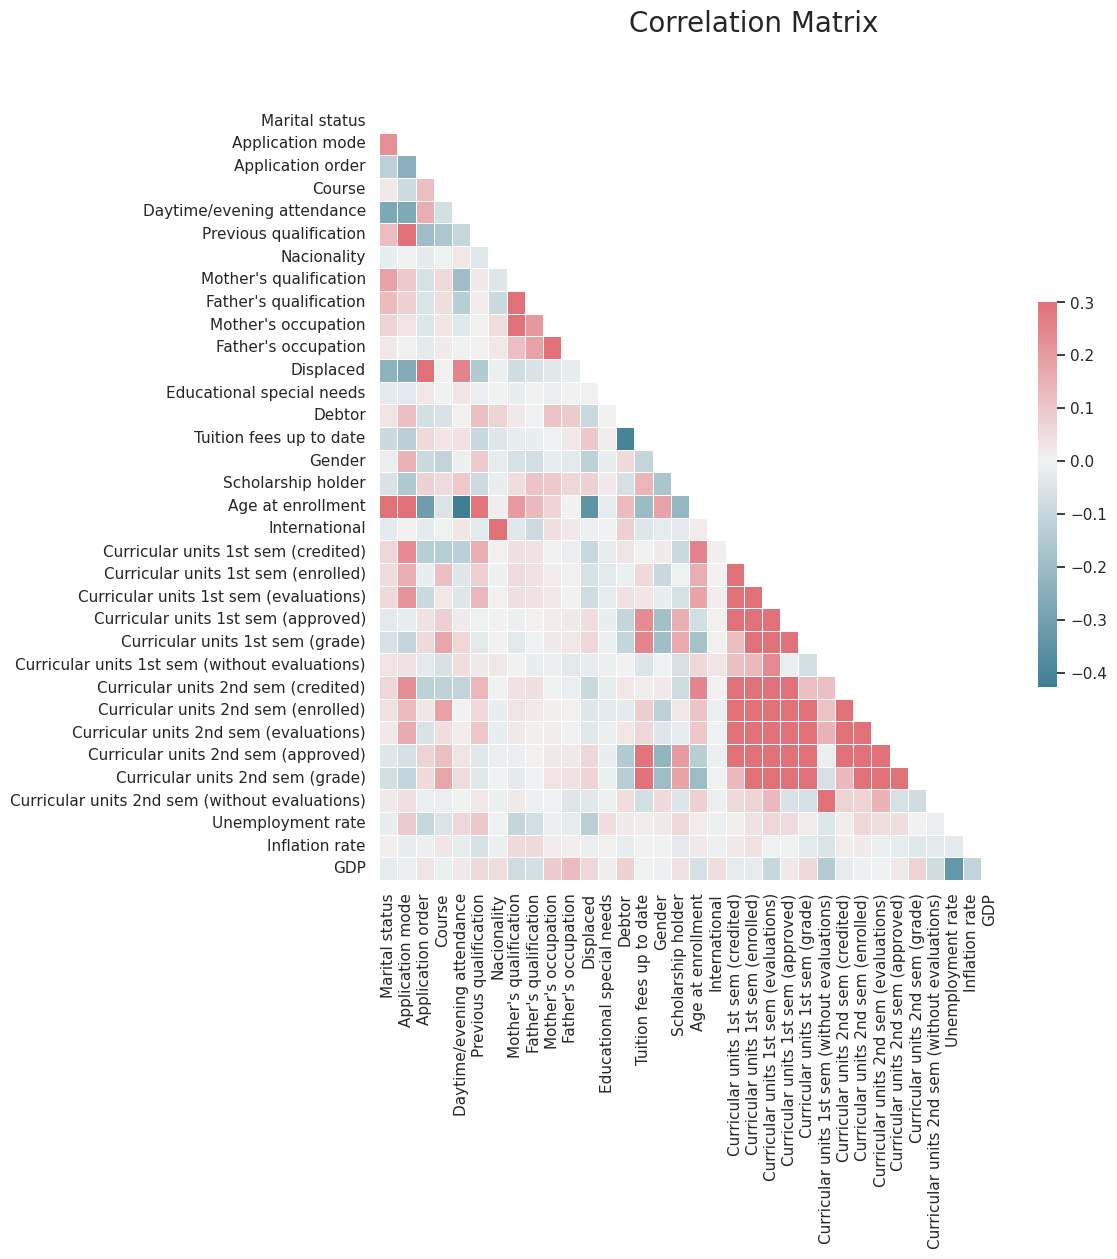

In [105]:
sns.set(style="white")
cm = sns.diverging_palette(5, 250, as_cmap=True)

df2 = df.drop('Target', axis=1)

corr2 = df2.corr()

mask = np.zeros_like(corr2, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(10, 10))
f.suptitle('Correlation Matrix', fontsize=20)
sns.heatmap(corr2, vmax=.3, cmap=cmap, mask=mask, center=0, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('correlation_matrix_heatmap.png')
plt.show()



### **Using Variable Inflation Factors (VIF) to Assess Multicollinearity**


Multicollinearity in a dataset, characterized by high correlations between independent variables, can impact the reliability of regression analysis. The Variable Inflation Factor (VIF) is a useful statistical measure for assessing multicollinearity.

**Key Points:**

1. **VIF Definition:** Variable Inflation Factor (VIF) quantifies the extent to which the variance of an estimated regression coefficient increases when predictor variables are correlated.

2. **Comparison with Correlation Matrix:** While a correlation matrix provides pairwise correlations between variables, VIF takes a step further. It evaluates the strength of a variable's correlation with a group of other independent variables, providing a more comprehensive view of multicollinearity.

3. **Initial Value:** VIF starts at 1 for each variable.

4. **Interpretation of VIF Values:** A VIF value exceeding 10 is often indicative of high multicollinearity. This implies that the variable in question is highly correlated with other variables, posing challenges in regression analysis.

Use the VIF to gain insights into the multicollinearity structure within your dataset and make informed decisions about variable inclusion in regression models.
"""


In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    """
    Calculate Variable Inflation Factors (VIF) for each variable in the dataset.

    Parameters:
    - X: DataFrame, input features.

    Returns:
    - vif: DataFrame, containing variables and their corresponding VIF values.
    """
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by='VIF', ascending=False)

    return vif

# Calculate and display VIF values
vif_result = calc_vif(df)
print(vif_result)

                                         Variables         VIF
20             Curricular units 1st sem (enrolled)  172.097311
26             Curricular units 2nd sem (enrolled)  155.823189
22             Curricular units 1st sem (approved)   42.904932
28             Curricular units 2nd sem (approved)   36.672113
23                Curricular units 1st sem (grade)   28.786313
29                Curricular units 2nd sem (grade)   26.822544
21          Curricular units 1st sem (evaluations)   19.707422
31                               Unemployment rate   19.272924
27          Curricular units 2nd sem (evaluations)   17.462958
19             Curricular units 1st sem (credited)   17.365923
17                               Age at enrollment   13.672027
25             Curricular units 2nd sem (credited)   13.562625
14                         Tuition fees up to date   10.718764
4                       Daytime/evening attendance   10.416883
9                              Mother's occupation   10

## Analysis



In [107]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

## Pre-processing

In [108]:
#df = df.drop(['Nacionality', 'GDP'], axis=1)
df = df[['Target','Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)','Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',  'Tuition fees up to date', 'Scholarship holder', 'Displaced', 'Application order', 'Daytime/evening attendance']]

In [109]:
df.corr()['Target'].sort_values(ascending=False)

Target                                 1.000000
Curricular units 2nd sem (approved)    0.624157
Curricular units 2nd sem (grade)       0.566827
Curricular units 1st sem (approved)    0.529123
Curricular units 1st sem (grade)       0.485207
Tuition fees up to date                0.409827
Scholarship holder                     0.297595
Displaced                              0.113986
Application order                      0.089791
Daytime/evening attendance             0.075107
Name: Target, dtype: float64

## Prediction

In [111]:
from sklearn.ensemble import RandomForestRegressor
# permutation
from sklearn.inspection import permutation_importance
# scoring metric
from sklearn.metrics import mean_squared_error

In [112]:
# Assigning all the feature columns to variable x and target to variable y
y = df['Target']
X = df.drop(columns=['Target'],axis=1)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3539, 9)
(885, 9)
(3539,)
(885,)


## Addressing the imbalance

In [125]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)

print("With CV: ",scores.mean())
print("Precision Score: ", precision_score(y_test, y_pred,average='macro'))
print("Recall Score: ", recall_score(y_test, y_pred,average='macro'))
print("F1 Score: ", f1_score(y_test, y_pred,average='macro'))

Without CV:  0.7480225988700565
With CV:  0.745973175845457
Precision Score:  0.6862838045697345
Recall Score:  0.6437019103110279
F1 Score:  0.6488998401024791


In [110]:
dtree = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=2)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)


In [115]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# define model
model = BaggingClassifier()

In [116]:
dtree.fit(X_train,y_train)
rfc.fit(X_train,y_train)
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
abc.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



AdaBoostClassifier(learning_rate=1, random_state=0)

In [117]:
y_pred = dtree.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 68.25 %


In [118]:
y_pred = rfc.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 72.99 %


In [119]:
y_pred = knn.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 64.41 %


In [120]:
y_pred = lr.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 71.53 %


In [121]:
y_pred = abc.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 74.58 %


In [122]:
# get permutation importance for each model on training data
premu_rfc_train = permutation_importance(rfc, X_train, y_train)
premu_svm_train = permutation_importance(abc, X_train, y_train)

# get permutation importance for each model on test data
premu_rfc_test = permutation_importance(rfc, X_test, y_test)
premu_svm_test = permutation_importance(abc, X_test, y_test)


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Curricular units 2nd sem (approved)'),
  Text(1, 0, 'Curricular units 2nd sem (grade)'),
  Text(2, 0, 'Curricular units 1st sem (approved)'),
  Text(3, 0, 'Curricular units 1st sem (grade)'),
  Text(4, 0, 'Tuition fees up to date'),
  Text(5, 0, 'Scholarship holder'),
  Text(6, 0, 'Displaced'),
  Text(7, 0, 'Application order'),
  Text(8, 0, 'Daytime/evening attendance')])

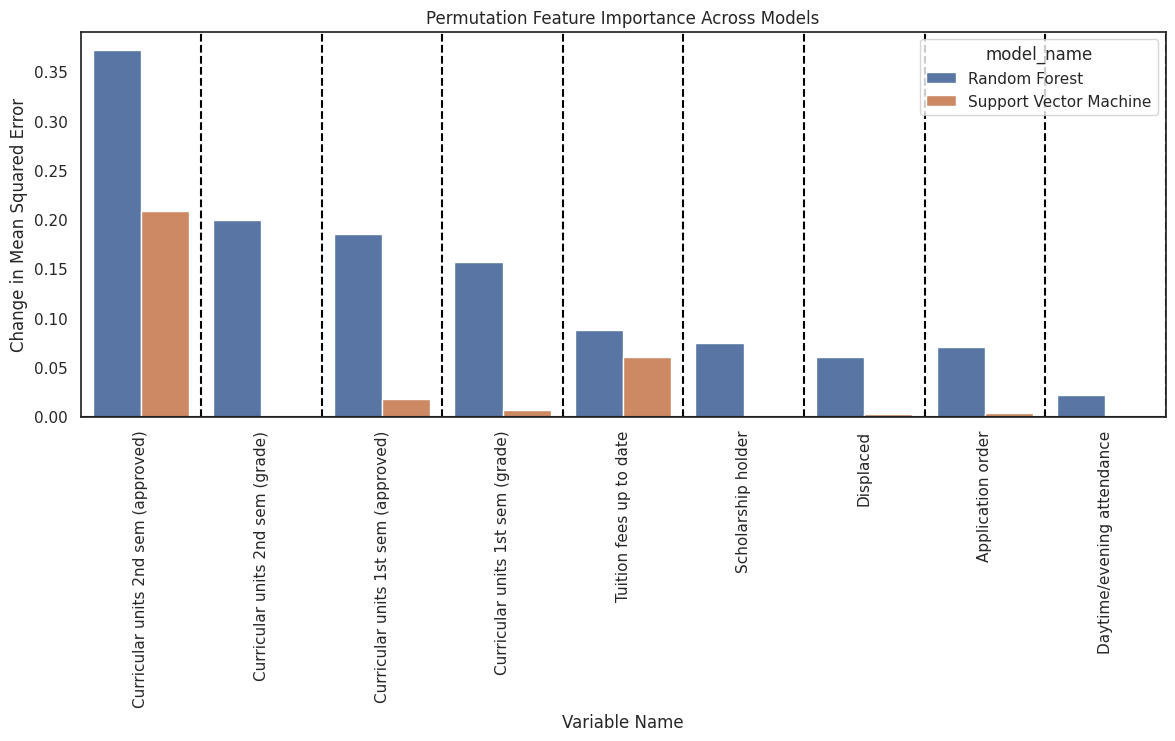

In [123]:
# gather results together for extraction
# uncomment if yo uwould ike to use trianing data
results = [premu_rfc_train, premu_svm_train]
n_cols = X_train.shape[1]

# change name of the models as neccesary
names = [
    'Random Forest',
    'Adaboost'
    ]

# extract data and names from permutation results
graph_data = {}
for result, name in zip(results, names):
    graph_data[name] = result['importances_mean']

# make final dataframe
graph_data = pd.DataFrame.from_dict(graph_data, orient='index', columns=X_train.columns)
graph_data.reset_index(inplace=True, drop=False)
graph_data.rename(columns={'index': 'model_name'}, inplace=True)
graph_data = graph_data.melt(id_vars='model_name')

# create visual
plt.figure(figsize=[14,5])
plt.axhline(0, c='black')
[plt.axvline(i + 0.5, linestyle='--', c='black') for i in range(0, n_cols)]
sns.barplot(x=graph_data['variable'], y=graph_data['value'], hue=graph_data['model_name'])
plt.title("Permutation Feature Importance Across Models")
plt.xlabel("Variable Name")
plt.ylabel("Change in Mean Squared Error")
# Rotate x-axis labels
plt.xticks(rotation=90)

<ipython-input-124-f4dec830f559>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-124-f4dec830f559>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



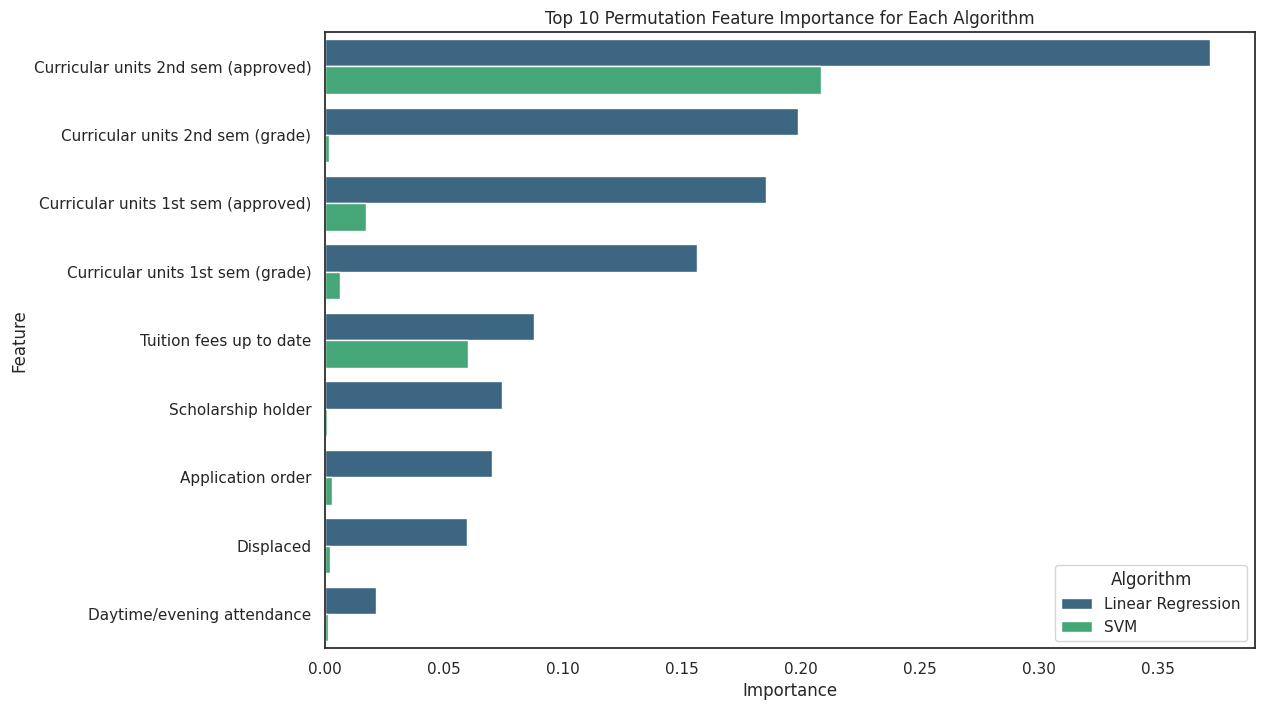

In [124]:
# Assuming you have a list of results for each algorithm, e.g., premu_lr_train, premu_svm_train, etc.
results = [premu_rfc_train, premu_svm_train]  # Add your other results

# Assuming you have a list of algorithm names
algorithm_names = ['Linear Regression', 'SVM', 'Random Forest']  # Add your other algorithm names

# Create a DataFrame to store the top 10 features for each algorithm
top_features_df = pd.DataFrame()

# Extract the top 10 features for each algorithm
for result, algorithm_name in zip(results, algorithm_names):
    # Assuming 'importances_mean' contains the mean importance scores
    feature_importances = result['importances_mean']

    # Create a DataFrame with feature names and importances
    feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

    # Sort the DataFrame by importance in descending order
    feature_df = feature_df.sort_values(by='Importance', ascending=False)

    # Select the top 10 features
    top_10_features = feature_df.head(10)

    # Add a column for the algorithm name
    top_10_features['Algorithm'] = algorithm_name

    # Append the results to the main DataFrame
    top_features_df = pd.concat([top_features_df, top_10_features])

# Plot the results using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', hue='Algorithm', data=top_features_df, palette='viridis')
plt.title('Top 10 Permutation Feature Importance for Each Algorithm')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


param_grid = {
    'bootstrap': [False,True],
    'max_depth': [5,8,10, 20],
    'max_features': [3, 4, 5, None],
    'min_samples_split': [2, 10, 12],
    'n_estimators': [100, 200, 300]
}

rfc = RandomForestClassifier()

clf = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print(clf.best_params_)
print(clf.best_estimator_)

References:
https://medium.com/@T_Jen/feature-importance-for-any-model-using-permutation-7997b7287aa

https://www.kaggle.com/code/jeevabharathis/student-dropout-analysis-for-school-education
